# Анализ параметров сделки продаж акций Apple

Задача: выявить зависимости между параметрами

Данные:

    • Deals count - Количество сделок за период
    • Buy count - Количество сделок с флагом buy (AggressorSide)
    • Sell count - Количество сделок с флагом sell 
    • %Buy count – в % количество сделок с флагом buy (AggressorSide) от общего числа сделок за период
    • Sell size - Сумма объемов сделок с флагом sell
    • Buy size - Сумма объемов сделок с флагом buy
    • Sum size – общая сумма объемов сделок (sizes) за период
    • %Buy size - в % Сумма объемов сделок с флагом buy от общей суммы объемов сделок за период
    • Min size - Минимальный объем сделки за период
    • Max size - Максимальный объем сделки за период
    • AVG size - Средний объем за период
    • Size dispersion - Дисперсия объема за период
    • Size deviation - Среднеквадратическое отклонение объема за период
    • Weighted average price - Средневзвешенная цена за период
    • %d(Weighted average price) – процент изменения средневзвешенной цены = (текущая цена – цена за предыдущий период)/ цена за предыдущий период
    • First price - Цена первой сделки в период
    • Max price – максимальная цена в период
    • Min price – минимальная цена в период
    • Last price - Цена последней сделки в период
    • %(max-min) - разница максимальной и минимальной цены в % относительно First price
    • %(last-first) - разница последней и первой цены в % относительно First price
    • AVG price - Средняя цена за период
    • %d(AVG price) - процент изменения средней цены = (текущая цена – цена за предыдущий период)/ цена за предыдущий период
    • Price dispersion - Дисперсия цены за период
    • Price deviation - Среднеквадратическое отклонение цены за период
    • Weighted average size - Средневзвешенный объем за период 
    • Count diff - Разница количества сделок с флагом buy минус количества сделок с флагом sell
    • Count diff sum- сумма параметров Count diff за все предыдущие периоды
    • Size diff - Разница объемов сделок с флагом buy минус объемы сделок с флагом sell
    • Size diff sum - сумма параметров Size diff за все предыдущие периоды



# 1. Изучение и предобработка данных

In [21]:
#импорт библиотек
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [22]:
df = pd.read_excel('C:\projects\AAPL_TnS-5_min_analysis.xlsx') 
display(df.head())
print(df.duplicated().sum())

,Date,Deals count,Buy count,Sell count,%Buy count,Sell size,Buy size,Sum size,%Buy size,Min size,Max size,AVG size,Size dispersion,Size deviation,Weighted average price,%d(Weighted average price),First price,Min price,Max price,Last price,%(max-min),%(last-first),AVG price,%d(AVG price),Price dispersion,Price deviation,Weighted average size,Count diff,Count diff sum,Size diff,Size diff sum
0,2020-06-15 10Hours 0-5 Minutes,4778,2396,2382,50.146505,430562,406150,836712,48.541195,100,5000,175.117622,92625.937190,304.345096,336.161521,0.237034,336.1100,335.6400,336.859,336.527,0.362679,0.124067,336.160735,0.239429,0.096783,0.311100,175.118032,14,-4896,-24412,-1491320
1,2020-06-15 10Hours 05-10 Minutes,4694,2406,2288,51.256924,456114,398724,854838,46.643224,100,10600,182.112910,137746.016651,371.141505,336.996198,0.292402,336.5286,336.4100,337.645,337.470,0.366982,0.279738,337.004137,0.301798,0.081501,0.285484,182.108620,118,-6770,-57390,-1836002
2,2020-06-15 10Hours 10-15 Minutes,4336,2010,2326,46.356089,422810,349136,771946,45.228034,100,6000,178.031827,98316.938563,313.555320,337.017641,0.254675,337.4900,336.4800,337.585,336.520,0.327417,-0.287416,337.014907,0.254096,0.073572,0.271242,178.033271,-316,-5212,-73674,-1564994
3,2020-06-15 10Hours 15-20 Minutes,3430,1678,1752,48.921283,328606,335774,664380,50.539450,100,5000,193.696793,100459.221185,316.953027,336.372644,-0.191384,336.5200,335.8801,336.910,336.800,0.306044,0.083205,336.377460,-0.189145,0.058400,0.241660,193.694019,-74,-5286,7168,-1557826
4,2020-06-15 10Hours 20-25 Minutes,3372,1492,1880,44.246738,331144,276132,607276,45.470593,100,5000,180.093713,101035.898691,317.861446,336.528434,0.046315,336.7600,335.9700,337.180,336.160,0.359306,-0.178168,336.508475,0.038949,0.083949,0.289739,180.104395,-388,-5674,-55012,-1612838


0


In [23]:
#приведем названия столбцов к нижнему регистру и заменим пробел нанижнее подчеркивание
df = df.reset_index()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("( )", "_")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       355 non-null    int64  
 1   date                        355 non-null    object 
 2   deals_count                 355 non-null    int64  
 3   buy_count                   355 non-null    int64  
 4   sell_count                  355 non-null    int64  
 5   %buy_count                  355 non-null    float64
 6   sell_size                   355 non-null    int64  
 7   buy_size                    355 non-null    int64  
 8   sum_size                    355 non-null    int64  
 9   %buy_size                   355 non-null    float64
 10  min_size                    355 non-null    int64  
 11  max_size                    355 non-null    int64  
 12  avg_size                    355 non-null    float64
 13  size_dispersion             355 non

В данных отсутствуют пропущенные значения и дубликаты. Типы данных верные, кроме даты и времени. 

# 2. Исследовательский анализ данных

Для дальнейшего анализа создадим новый датафрейм с данными без столбцов с процентами, отклонениями, дисперсиями, минимальными и максимальными значениями, а также средневзвешанные значения.

In [24]:
new_df = df.drop(['%buy_count', '%buy_size', 'min_size', 'max_size', 
                  'size_dispersion', 'size_deviation', 'weighted_average_price',
                  '%d(weighted_average_price)', 'min_price',
                  'max_price', '%(max-min)', '%(last-first)',
                  '%d(avg_price)', 'price_dispersion', 'weighted_average_size',
                  'price_deviation', 'count_diff', 'count_diff_sum', 'size_diff',
                  'size_diff_sum'], axis='columns')
display(new_df.head())

,index,date,deals_count,buy_count,sell_count,sell_size,buy_size,sum_size,avg_size,first_price,last_price,avg_price
0,0,2020-06-15 10Hours 0-5 Minutes,4778,2396,2382,430562,406150,836712,175.117622,336.1100,336.527,336.160735
1,1,2020-06-15 10Hours 05-10 Minutes,4694,2406,2288,456114,398724,854838,182.112910,336.5286,337.470,337.004137
2,2,2020-06-15 10Hours 10-15 Minutes,4336,2010,2326,422810,349136,771946,178.031827,337.4900,336.520,337.014907
3,3,2020-06-15 10Hours 15-20 Minutes,3430,1678,1752,328606,335774,664380,193.696793,336.5200,336.800,336.377460
4,4,2020-06-15 10Hours 20-25 Minutes,3372,1492,1880,331144,276132,607276,180.093713,336.7600,336.160,336.508475


In [25]:
#посмотрим распределения средних значений и отклонений в параметрах
print(new_df.describe())

            index   deals_count     buy_count    sell_count     sell_size  \
count  355.000000    355.000000    355.000000    355.000000  3.550000e+02   
mean   177.000000   3158.276056   1607.847887   1550.428169  2.856402e+05   
std    102.623909   2020.311595   1015.651765   1025.731883  1.756466e+05   
min      0.000000    912.000000    488.000000    374.000000  6.682600e+04   
25%     88.500000   2048.000000    979.000000    981.000000  1.771120e+05   
50%    177.000000   2710.000000   1368.000000   1368.000000  2.547740e+05   
75%    265.500000   3754.000000   1918.000000   1844.000000  3.504430e+05   
max    354.000000  24264.000000  12328.000000  11936.000000  1.854840e+06   

           buy_size      sum_size    avg_size  first_price  last_price  \
count  3.550000e+02  3.550000e+02  355.000000    355.00000  355.000000   
mean   2.897622e+05  5.754025e+05  183.119156    349.37137  349.365949   
std    1.786869e+05  3.498249e+05   18.083948      5.34251    5.296611   
min    7.5

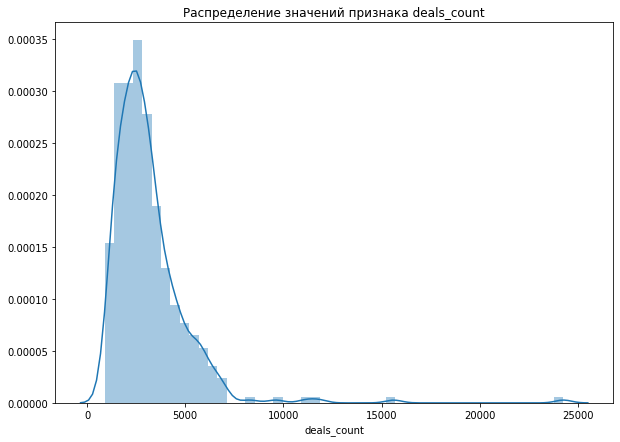

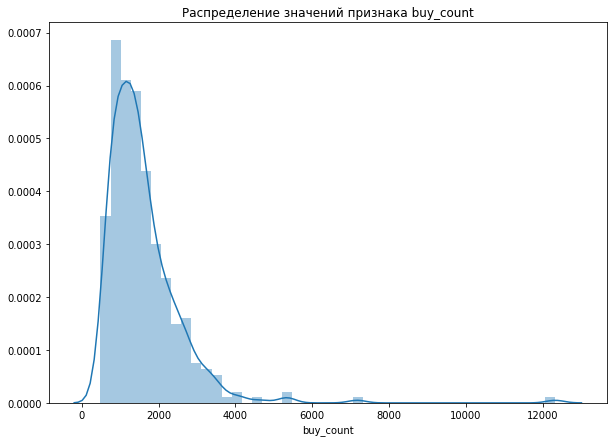

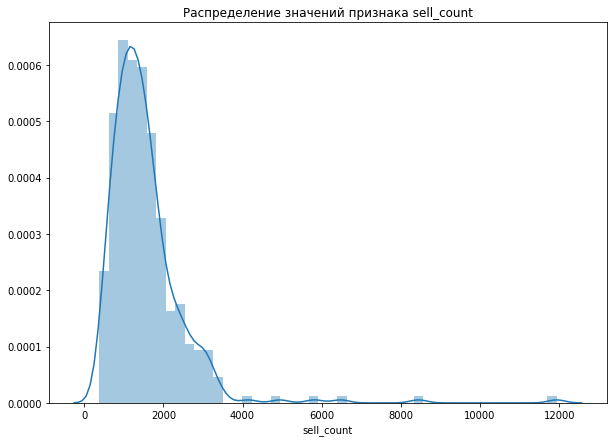

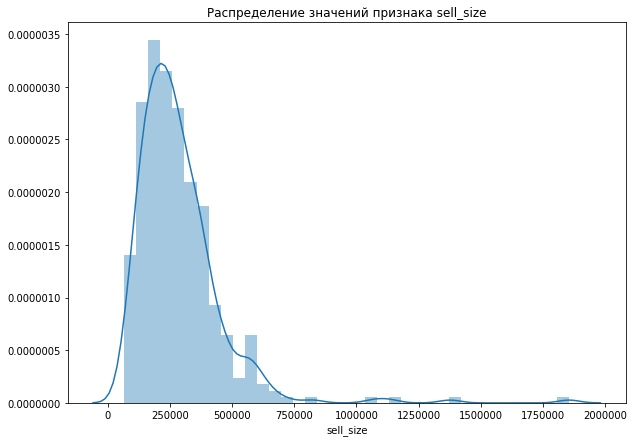

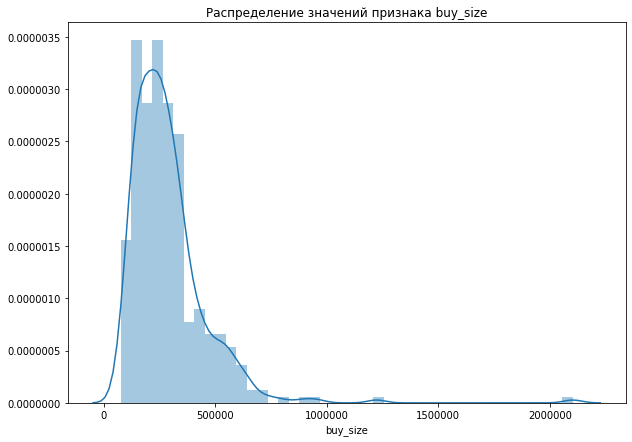

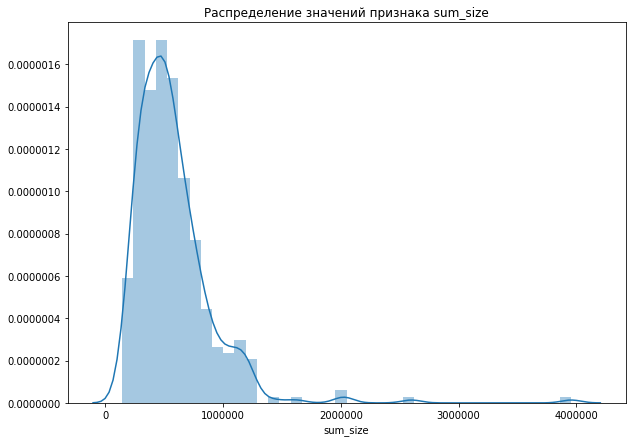

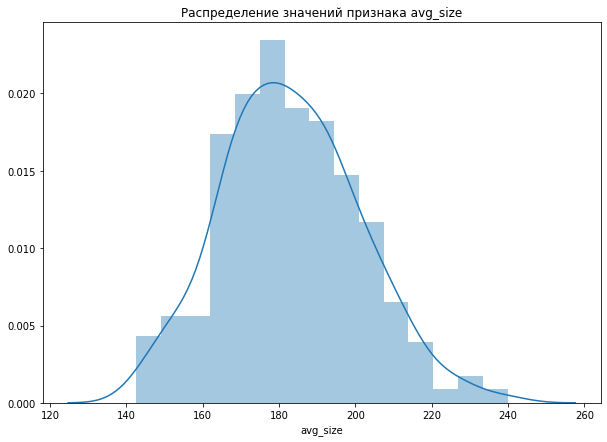

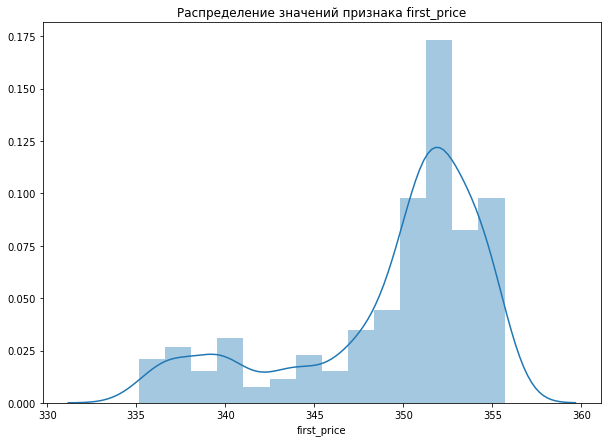

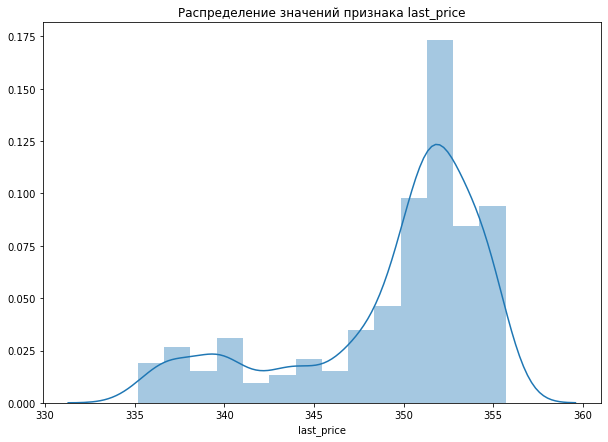

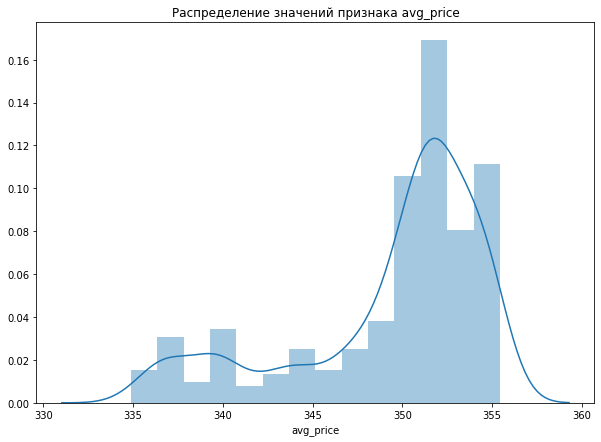

In [26]:
#построим графики распределения данных, при этом удалим из данных столбец с датой
for column in new_df.drop(['index','date'], axis='columns'):
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    sns.distplot(df[column])
    plt.title('Распределение значений признака '+ str(column))
    plt.show()
    



Среднее количесвто совершенных сделок за период составляет 3158, стандартное отклонение отклонение 2020 сделок, минимально совершено 912 сделок, максимально 24264 сделки. В среднем количество сделок sell меньше на 3,7% количества сделок buy. Средняя изначальная цена и окончательная различаются на 0,0002%, при этом окончательная цена ниже на указанное значение. 
Что касается распределения признаков. Средний объем сделок за период имеет нормальное распределение, а средняя цена смещена вправо. 

,deals_count,buy_count,sell_count,sell_size,buy_size,sum_size,avg_size,first_price,last_price,avg_price
deals_count,1.000000,0.989575,0.989780,0.968503,0.970868,0.982193,-0.080653,-0.145346,-0.137660,-0.132998
buy_count,0.989575,1.000000,0.958922,0.938819,0.979451,0.971673,-0.082022,-0.138189,-0.121741,-0.121064
sell_count,0.989780,0.958922,1.000000,0.977999,0.942425,0.972433,-0.077641,-0.149447,-0.150593,-0.142083
sell_size,0.968503,0.938819,0.977999,1.000000,0.949424,0.987054,0.083164,-0.176275,-0.177330,-0.169383
buy_size,0.970868,0.979451,0.942425,0.949424,1.000000,0.987494,0.081487,-0.164553,-0.147404,-0.147293
sum_size,0.982193,0.971673,0.972433,0.987054,0.987494,1.000000,0.083379,-0.172560,-0.164330,-0.160283
avg_size,-0.080653,-0.082022,-0.077641,0.083164,0.081487,0.083379,1.000000,-0.185164,-0.179761,-0.182321
first_price,-0.145346,-0.138189,-0.149447,-0.176275,-0.164553,-0.172560,-0.185164,1.000000,0.994733,0.997763
last_price,-0.137660,-0.121741,-0.150593,-0.177330,-0.147404,-0.164330,-0.179761,0.994733,1.000000,0.998478
avg_price,-0.132998,-0.121064,-0.142083,-0.169383,-0.147293,-0.160283,-0.182321,0.997763,0.998478,1.000000


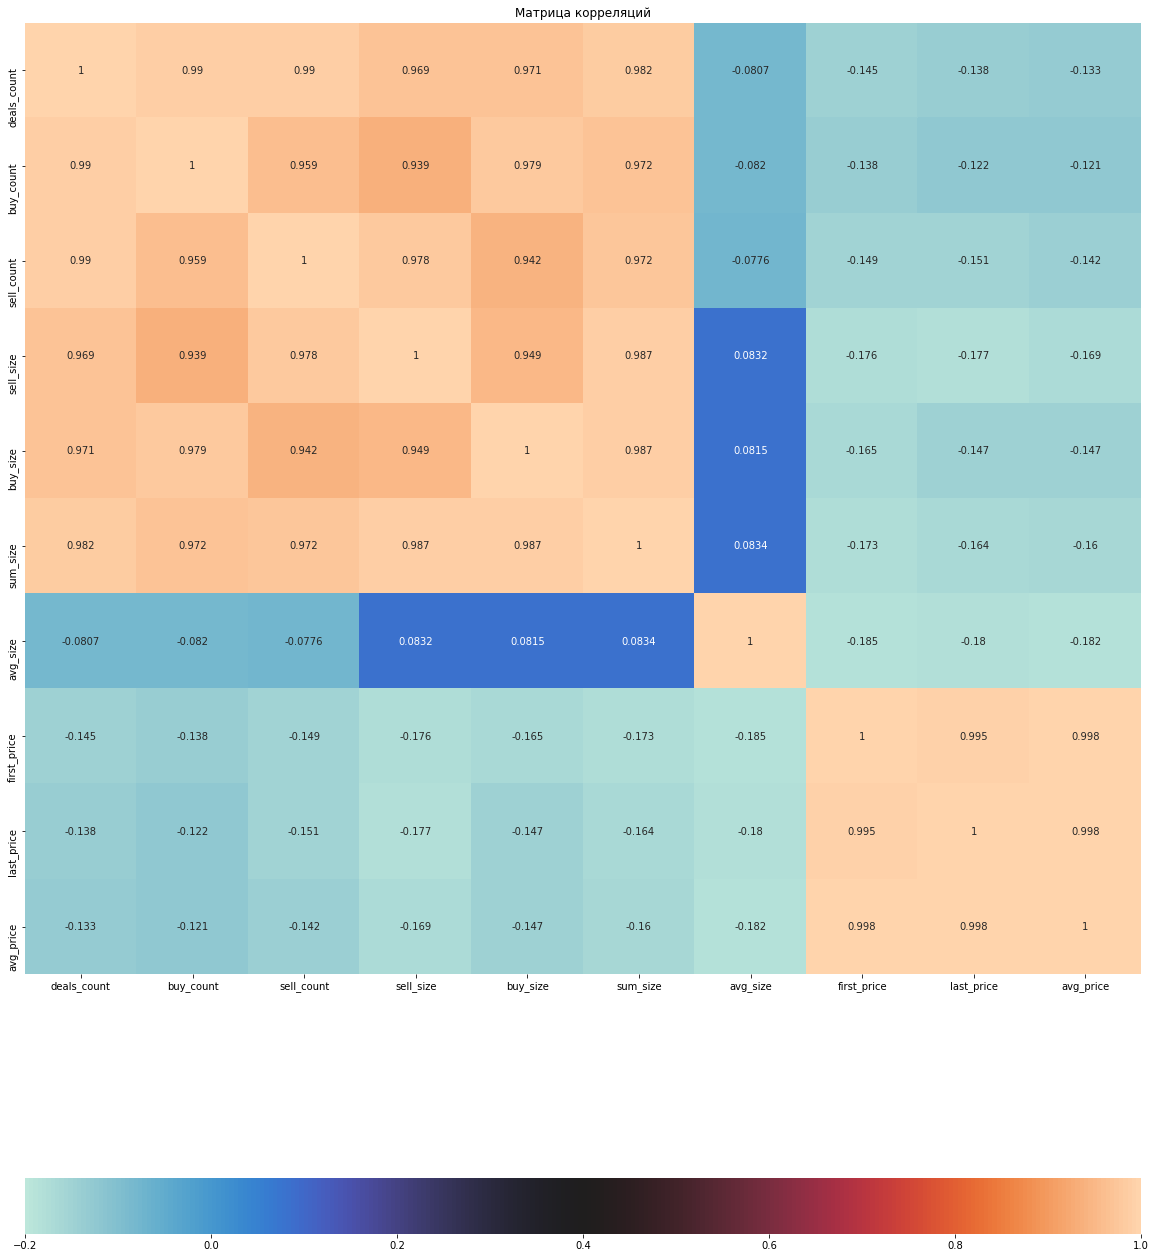

In [27]:
#построим матрицу корреляций 
cm = new_df.drop(['index','date'], axis='columns').corr()
display(cm)
fig, ax = plt.subplots()
fig.set_size_inches(20, 25)
sns.heatmap(cm, annot = True, fmt='.3g', vmin=-0.2, vmax=1, center=0.4, cbar_kws= {'orientation': 'horizontal'})
plt.title('Матрица корреляций')
plt.show()

Количесво сделок и сумма сделок имеют с ценой обратную зависимость, то есть чем больше сделок и сумма сделки, тем меньше цена. Сильную прямую зависимость имеют параметры количество сделок и сумма сделки, чем больше количсетво сделок, тем больше сумма. 

In [28]:
#построим матрицу корреляций по всем данным
corr = df.drop(['index','date', 'min_size'], axis='columns').corr()
pd.set_option('display.max_columns', None)
display(corr)

,deals_count,buy_count,sell_count,%buy_count,sell_size,buy_size,sum_size,%buy_size,max_size,avg_size,size_dispersion,size_deviation,weighted_average_price,%d(weighted_average_price),first_price,min_price,max_price,last_price,%(max-min),%(last-first),avg_price,%d(avg_price),price_dispersion,price_deviation,weighted_average_size,count_diff,count_diff_sum,size_diff,size_diff_sum
deals_count,1.000000,0.989575,0.989780,-0.064089,0.968503,0.970868,0.982193,-0.021002,0.282745,-0.080653,0.041406,0.044979,-0.132821,0.022809,-0.145346,-0.169732,-0.103926,-0.137660,0.754886,0.088190,-0.132998,0.023572,0.606988,0.656891,-0.080626,-0.034794,0.016692,0.059671,0.357132
buy_count,0.989575,1.000000,0.958922,0.062709,0.938819,0.979451,0.971673,0.084526,0.278729,-0.082022,0.037940,0.040173,-0.120848,0.058122,-0.138189,-0.157612,-0.093280,-0.121741,0.735336,0.171978,-0.121064,0.058235,0.578270,0.635027,-0.081989,0.109503,0.016646,0.179252,0.335851
sell_count,0.989780,0.958922,1.000000,-0.188324,0.977999,0.942425,0.972433,-0.125061,0.280913,-0.077641,0.043988,0.048813,-0.141947,-0.012626,-0.149447,-0.178247,-0.112333,-0.150593,0.758735,0.003414,-0.142083,-0.011234,0.622953,0.665046,-0.077619,-0.176958,0.016395,-0.059960,0.370868
%buy_count,-0.064089,0.062709,-0.188324,1.000000,-0.184942,0.048968,-0.067847,0.838393,-0.028897,-0.021458,-0.029424,-0.041496,0.133169,0.178479,0.104846,0.134544,0.125782,0.154125,-0.137811,0.466003,0.132849,0.173916,-0.113305,-0.139948,-0.021410,0.877469,0.044232,0.730757,-0.174826
sell_size,0.968503,0.938819,0.977999,-0.184942,1.000000,0.949424,0.987054,-0.164177,0.372057,0.083164,0.174052,0.189649,-0.169198,-0.021886,-0.176275,-0.206706,-0.137616,-0.177330,0.802107,0.006994,-0.169383,-0.020592,0.672796,0.718136,0.083189,-0.169618,-0.056631,-0.106280,0.345229
buy_size,0.970868,0.979451,0.942425,0.048968,0.949424,1.000000,0.987494,0.112939,0.349447,0.081487,0.153080,0.163350,-0.147040,0.052934,-0.164553,-0.185571,-0.118003,-0.147404,0.779462,0.181059,-0.147293,0.053024,0.619422,0.681844,0.081521,0.096014,-0.049204,0.211315,0.307002
sum_size,0.982193,0.971673,0.972433,-0.067847,0.987054,0.987494,1.000000,-0.024745,0.365303,0.083379,0.165583,0.178660,-0.160061,0.016049,-0.172560,-0.198575,-0.129371,-0.164330,0.800878,0.095995,-0.160283,0.016745,0.654204,0.708854,0.083409,-0.036122,-0.053567,0.054575,0.330152
%buy_size,-0.021002,0.084526,-0.125061,0.838393,-0.164177,0.112939,-0.024745,1.000000,-0.059363,-0.010027,-0.065454,-0.080470,0.104932,0.142353,0.079672,0.103143,0.099524,0.123891,-0.072171,0.418424,0.104590,0.137925,-0.064789,-0.081470,-0.009977,0.731490,0.052956,0.868695,-0.155363
max_size,0.282745,0.278729,0.280913,-0.028897,0.372057,0.349447,0.365303,-0.059363,1.000000,0.401108,0.798620,0.786030,-0.181421,0.013929,-0.183939,-0.196720,-0.168098,-0.181384,0.371102,0.041771,-0.181446,0.014404,0.306722,0.362489,0.401095,-0.017251,-0.187763,-0.051554,0.117221
avg_size,-0.080653,-0.082022,-0.077641,-0.021458,0.083164,0.081487,0.083379,-0.010027,0.401108,1.000000,0.729675,0.781418,-0.182132,0.056792,-0.185164,-0.186591,-0.178793,-0.179761,0.147035,0.068847,-0.182321,0.056128,0.121536,0.161251,1.000000,-0.012528,-0.390948,-0.000831,-0.125536


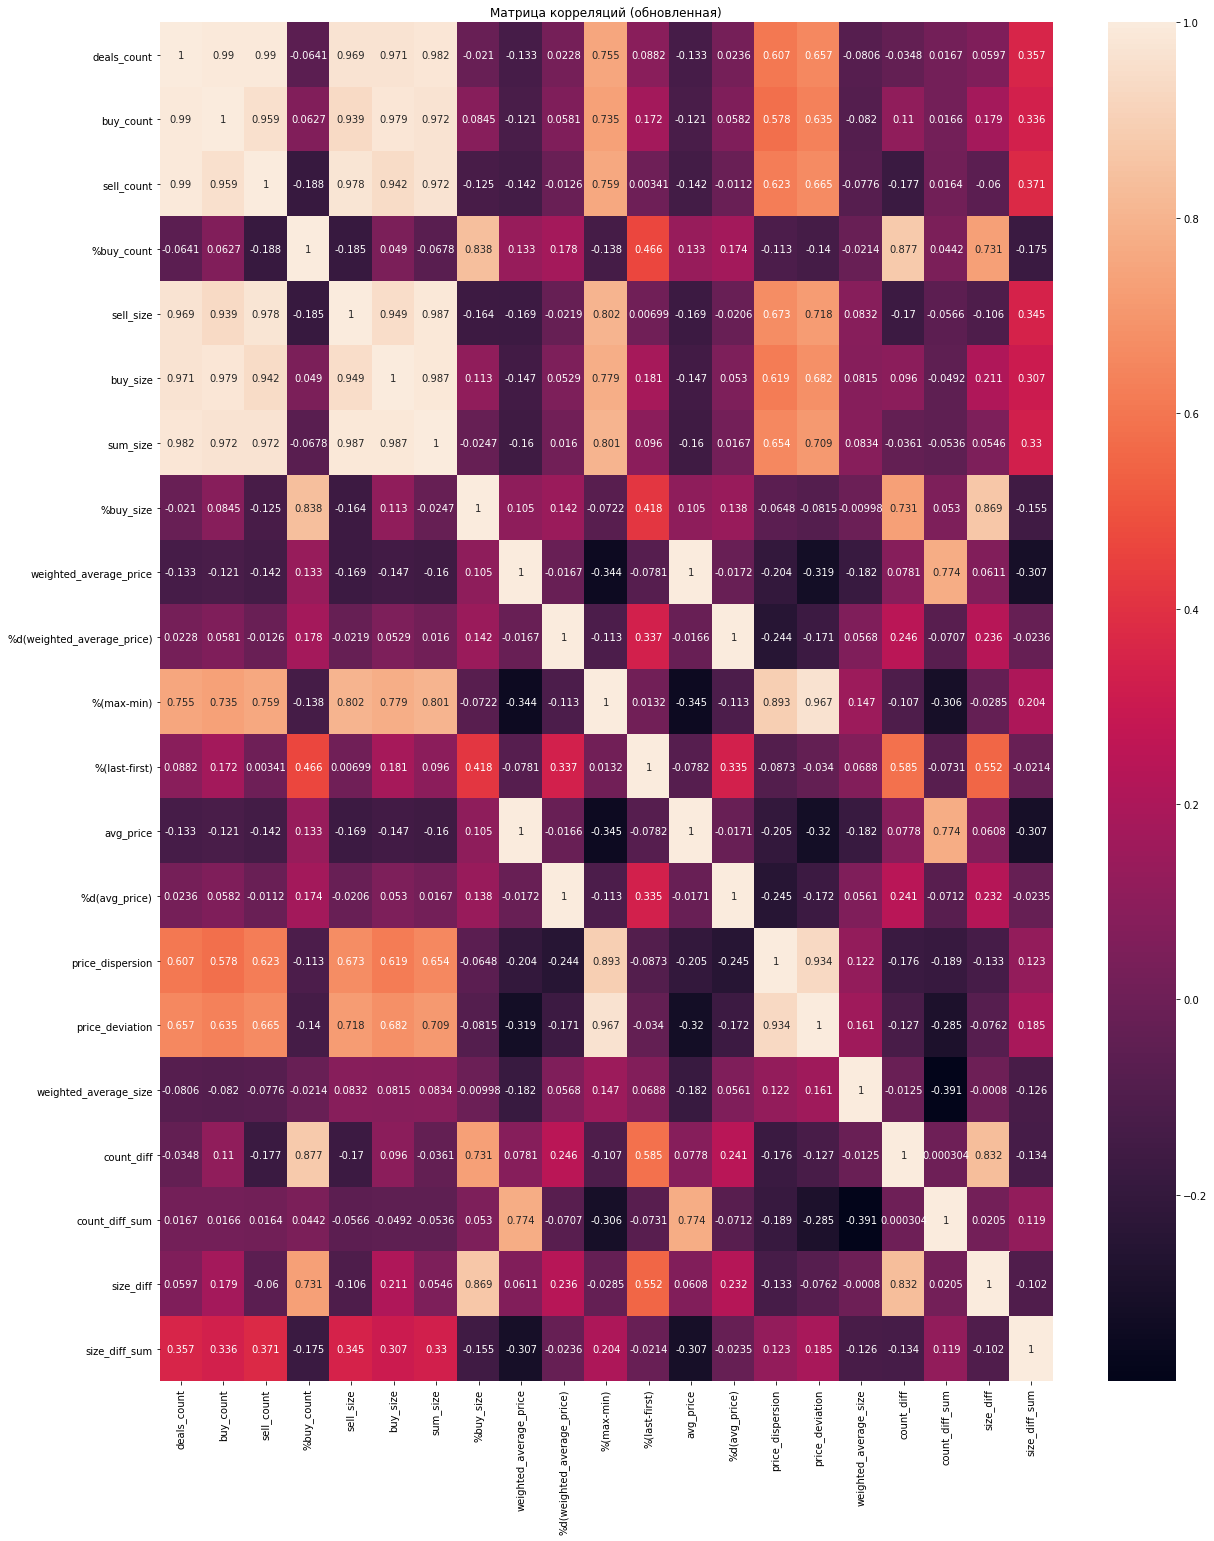

In [29]:
corr_new = df.drop(['index','date', 'min_size', 'avg_size', 'max_size', 'size_dispersion',
          'size_deviation', 'first_price', 'min_price', 'max_price', 'last_price'], axis='columns').corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 25)
sns.heatmap(corr_new, annot = True, fmt='.3g')
plt.title('Матрица корреляций (обновленная)')
plt.show()

Наиболее сильная корреляция параметра количество сделок за период с дисперсией цены за период (0,61), среднеквадратическим отклонением (0,66), разницей максимальной и минимальной цены в % (0,76) и с размером сделки (0,97)
На среднюю цену наиболее сильное влияние оказывает параметр: сумма параметров Count diff за все предыдущие периоды (0,77)
Наиболее сильная обратная зависимость замечена у параметров Weighted average size (средневзвешенный объем за период) и  Count diff sum (сумма параметров Count diff за все предыдущие периоды) -0,4. 

# Общий вывод

Для построения первой корреляционной матрицы были отобраны признаки, которые влияют на цену и не являются мультиколлинеарными, то есть сильно зависимыми, как например разница цен, %соотношения, дисперсии или стандартные отклонения. Вторая корреляционная матрица посроена практически по всем парамерам, исключены самые слабовлияющие параметры. 
Что касается прогнозирования цены, то в данном случае подошла бы модель линейной регрессии, но так как учтено мало признаков, влияющих на цену, считаю что ошибка прогнозирования будет достаточно высокой. 